# Nanodegree Udacity - WeRateDogs
#### Esse é o projeto WeRateDogs da Udacity na forma de um Nanodegree, onde são avaliados as competências dadas em aula,
#### Gather, Assess e Clean, como parte integrante do passaporte para certifcação no curso de Fundamentos de Data Scientis 2
#### cujos dados a serem tratados foram disponibilizados à Udacity, por uma conta do Twitter que classifica cães de forma bem
#### humorada.

## Gather

In [2]:
import pandas as pd
import numpy as np
import requests, os
import tweepy
import jsonpickle
import json

In [3]:
# Faz o diretório caso não exisata
folder_name = 'image_predicted'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
# Caminho do arquivo 
image_predicted_url  = ["https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"]

# Busca no servidor da Udacity arquivo
for url in image_predicted_url:
    # busca o arquivo
    response = requests.get(url)
    # grava o arquivo localmente
    with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
        file.write(response.content)

In [4]:
# Lê os tweet
df_archived_tweets = pd.read_csv('twitter_archive_enhanced.csv')

# Cria um dataframe a partir do arquivo 
df_image_predicted = pd.read_csv('image_predicted/image-predictions.tsv', sep='\t')

In [ ]:
#Credenciais (site dev twitter)
consumer_key = ''
consumer_secret = ''

access_token = ''
access_token_secret = ''

# autenticando na API do Twitter
#  dica retirada do site https://www.karambelkar.info/2015/01/how-to-use-twitters-search-rest-api-most-effectively./
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)

# criando o objeto da API:
#  wait_on_rate_limit = True (a propria lib Tweepy ira tratar o time-out da api)
#  wait_on_rate_limit_notify = True (a propria lib Tweepy ira emitir um alerta que entrou em espera)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

# verifiando se foi conectado
if (not api):
    print ("Can't Authenticate")

# cria lista dos tweets a serem pesquisados
tweet_id_list = df_archived_tweets.tweet_id.tolist()
# cria lista vazia dos tweets que venham a dar erro de leitura
tweet_is_list_error = []

print("Downloading tweets ")

#cria o arquivo tweet_json.txt
with open('tweet_json.txt', 'w') as outfile:
    # laço na lista de tweets
    for tweet_id in tweet_id_list:
        try:
            # buscando os dados do tweet informado
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            # escrevendo o JSON do tweet encontrado
            outfile.write(jsonpickle.encode(tweet._json, unpicklable=False) + '\n')
        except tweepy.TweepError as e:
            # em caso de erro de leitura do tweet, inserir tweet na lista de erro
            tweet_is_list_error.append(tweet_id)

print(tweet_is_list_error.count)
print ("Downloaded tweets")

In [5]:
# Lê o arquivo tweet_json.txt e cria um dataframe

# Cria uma lista vazia dos tweets
df_tweet_json = []

# Are o arquivo tweet_json
with open('tweet_json.txt', 'r') as json_file:
    # Lê o arquivo JSON linha a linha
    for line in json_file:
        # lendo o JSON
        j_content = json.loads(line)
        # Estabelece a estrutura do JSON 
        df_tweet_json.append({'tweet_id': j_content['id'], 
                              'favorite_count': j_content['favorite_count'],
                              'retweet_count': j_content['retweet_count']})

# Cria um dataframe a partir dessa lista
df_tweet_json = pd.DataFrame(df_tweet_json)

## Assess

In [6]:
# Verifica de forma visual o dataframe
df_image_predicted

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [7]:
# Utiliza a função info para as colunas
df_image_predicted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
# Verifica se há tweet duplicado
df_image_predicted[df_image_predicted.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [9]:
# Exibe informação sobre as colunas
df_image_predicted.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [10]:
# Aborda visualmente
df_archived_tweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [11]:
# Programação para análise
df_archived_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
# Verifica possível tweet duplicado
df_archived_tweets[df_archived_tweets.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [13]:
# Quantidade de linhas agrupadas na coluna rating_numerator
df_archived_tweets.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [14]:
# Filtra o data frame onde a coluna rating_numerator = 420
df_archived_tweets.loc[df_archived_tweets.rating_numerator == 420]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None


In [15]:
# Quantidade de tweets originais onde o id retweet e status de id seja nulo
df_archived_tweets[df_archived_tweets.retweeted_status_id.isnull() & df_archived_tweets.in_reply_to_status_id.isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

In [16]:
# Agrupa na coluna rating_denominator
df_archived_tweets.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [17]:
# Dados onde a coluna rating_denominator seja igual a 70
df_archived_tweets.loc[df_archived_tweets.rating_denominator == 70]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None


In [18]:
# Visualização dos tweets
df_tweet_json

,favorite_count,retweet_count,tweet_id
0,37797,8238,892420643555336193
1,32472,6088,892177421306343426
2,24445,4029,891815181378084864
3,41123,8395,891689557279858688
4,39331,9092,891327558926688256
5,19768,3017,891087950875897856
6,11559,1993,890971913173991426
7,63747,18314,890729181411237888
8,27166,4145,890609185150312448
9,31152,7158,890240255349198849


In [19]:
# Números de registros e colunas
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
favorite_count    2339 non-null int64
retweet_count     2339 non-null int64
tweet_id          2339 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


#### Em relação à qualidade dos dados
##### image predicted
- Quantidade de Tweets com a raça dos cachorros (2075) é diferente da base de Tweet Originais arquivados (2097).

#### archived tweets
- Falta do nome do cachorro em alguns tweets.
- Falta da classicação do estágio do cachorro (doggo / floofer / pupper / puppo) em alguns tweets.
- rating_numerator muito alto em alguns casos.
- rating_denominator maior que 10 (alguns tweets com mais de 1 cachorro, ex.: 820690176645140481).
- Falta da coluna Quantidade de Favorito.
- Falta da Coluna Quantidade de retweet.
- Alguns tweets da coluna name nao estao corretos, por exemplo, such, this.

#### Tidiness
#### archived tweets
- Classificação do estagio do cachorro em colunas separadas, 4 variaveis do mesmo tipo (doggo	floofer	pupper	puppo) em colunas colunas
- Predição da Raça do cachorro em data set separado.

## Clean

In [20]:
# Armazena os dados originais antes de limpar os mesmos
df_image_predicted_clean = df_image_predicted.copy()
df_tweet_json_clean = df_tweet_json.copy()
df_archived_tweets_clean = df_archived_tweets.copy()

### Quality

#### image predicted: 
É possível veificar que a quantidade de tweets com a raça dos cachorros é de 2075, e difere dos tweets originais
arquivados que aaparecem no número de 2097.

#### Define
A falta de estrutura e maiores informações enviabilizou a correção dos dados.

#### archived tweets:
Se observa a falta do nome dos cachorros em parte dos tweets.

#### Define
Não foi possível fazer a correção porque lguns tweets nao possuem o nome do cachorro, ex:dois cachorros na foto.

#### archived tweets:
Estágio do cachorro sem classificação como doggo, floofer, pupper, puppo nos tweets.

#### Define
Não foi possível fazer a correção porque alguns tweets não possuem o estágio do cachorro.

#### archived tweets: 
Número elevado na coluna rating_numerator em alguns eventos.

#### Define
Não há problema na estrutura, é apenas o autor se divertindo emema data festiva ta festiva.

#### archived tweets: 
Considerando tweets com rating_denominator maior que 10.

#### Define
Tweets onde aparece mais de 1 cachorro, ex.: 820690176645140481, seria necessário lançar mão de outra 
abordagem que possa atribuir a notas pra cada cachorro na foto.

#### archived tweets: 
Ausência das colunas quant. favorito, e retweet.

#### Define
Cria colunas como favorite_count, retweet_count no data frame df_archived_tweets_clean a partir do df_tweet_json_clean

## Code

In [21]:
# Faz um merge em (df_archived_tweets_clean x df_tweet_json_clean)
# usando como criterio de join o tweet_id a partir de todos os dados de df_archived_tweets_clean
df_archived_tweets_clean = pd.merge(df_archived_tweets_clean, df_tweet_json_clean,
                                    on=['tweet_id', 'tweet_id'], how='left')

## Test

In [22]:
# busca 2 registros aleatoriamente no data frame
df_archived_tweets_clean.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
925,755110668769038337,NaN,NaN,2016-07-18 18:43:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Watson. He trust falls on command. 13/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/755110668...,13,10,Watson,None,None,None,None,22274.0,11854.0
1812,676811746707918848,NaN,NaN,2015-12-15 17:11:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Penny &amp; Gizmo. They are pract...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676811746...,9,10,Penny,None,None,None,None,1450.0,444.0


#### archived tweets 
É possível verificar que parte dos tweets da coluna apresentam inconsistência, como such, this, all.

#### Define
Aqueles tweets onde há muitos cachorros, mas sem nomes especifícos a cada um deles.

### Tidiness

#### archived tweets
Estágio do cachorro em colunas separadas, como doggo, floofer, pupper e puppo.

#### Define
Coluna dog_stage, com evolução do cachorro, com possível uso de outras funções

## Code

In [23]:
#cria a coluna dog_stage
df_archived_tweets_clean['dog_stage'] = df_archived_tweets_clean[['doggo', 
                                                                  'floofer', 
                                                                  'pupper', 
                                                                  'puppo']].replace('None','').sum(1)

#drop the columns
df_archived_tweets_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

## Test

In [24]:
# localiza os tweets que contem os 3 exemplos: tweets com 3 estagios diferentes.
df_archived_tweets_clean.loc[df_archived_tweets_clean.tweet_id.isin([889665388333682689,
                                                                     667766675769573376,
                                                                     733822306246479872])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_stage
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,46957.0,9743.0,puppo
1110,733822306246479872,NaN,NaN,2016-05-21 00:50:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Moose. He's a Polynesian Floofer. Dapp...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/733822306...,10,10,Moose,3803.0,1065.0,floofer
2256,667766675769573376,NaN,NaN,2015-11-20 18:09:16 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Calvin. He is a Luxembourgian Mayo. Ha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667766675...,9,10,Calvin,440.0,219.0,


#### archived tweets
Predição da raça do cachorro em dataset separado.

#### Define
Cria colunas dog_breed, dog_breed_conf, opara a raça do cachorro e a confiabilidade, respectivamente.

## Code

In [25]:
# crio um DF com as colunas tweet_id, p1, p1_conf
df_image_2_use = df_image_predicted_clean[['tweet_id','p1','p1_conf']]

# realizo o merge dos DF df_archived_tweets_clean x df_image_2_use
df_archived_tweets_clean = pd.merge(df_archived_tweets_clean, df_image_2_use,
                                    on=['tweet_id', 'tweet_id'], how='left')

# altero o nome das colunas: P1 para dog_breed (raça do cachorro); 
#                            p1_conf para dog_breed_conf (confiabilidade do algoritmo de classificação)
df_archived_tweets_clean = df_archived_tweets_clean.rename(index=str, 
                                                           columns={"p1": "dog_breed", "p1_conf": "dog_breed_conf"})

## Test

In [26]:
# analise visual dos tweets
df_archived_tweets_clean.loc[df_archived_tweets_clean.tweet_id.isin([889665388333682689,
                                                                     667766675769573376,
                                                                     733822306246479872])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_stage,dog_breed,dog_breed_conf
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,46957.0,9743.0,puppo,Pembroke,0.966327
1110,733822306246479872,NaN,NaN,2016-05-21 00:50:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Moose. He's a Polynesian Floofer. Dapp...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/733822306...,10,10,Moose,3803.0,1065.0,floofer,Lhasa,0.457356
2256,667766675769573376,NaN,NaN,2015-11-20 18:09:16 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Calvin. He is a Luxembourgian Mayo. Ha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667766675...,9,10,Calvin,440.0,219.0,,fire_engine,0.883493


### Exporta os dados limpos para o arquivo abaixo

In [27]:
df_archived_tweets_clean.to_csv('twitter_archive_master.csv')

### Visualização dos dados

In [28]:
df_view = pd.DataFrame(columns=['tweet_id', 'retweet_count','favorite_count'])

with open('tweet_json.txt') as f:
    for line in f:
        status = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        
        df_view = df_view.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]], 
                                       columns = ['tweet_id', 'retweet_count', 'favorite_count']))
df_view = df_view.reset_index(drop = True)
df_view.sample(5)

,tweet_id,retweet_count,favorite_count
2035,671486386088865792,209,580
849,762464539388485633,4501,10849
2090,670465786746662913,563,979
1209,714141408463036416,1480,4469
1653,682429480204398592,1239,3577


### Os tweets mais retweetados

In [29]:
df_view.sort_values('retweet_count', ascending=False)[['tweet_id','retweet_count']].head()

,tweet_id,retweet_count
1023,744234799360020481,82996
1063,739238157791694849,61464
522,807106840509214720,60519
402,822872901745569793,47313
65,879415818425184262,43129


### Os tweets menos retweetados

In [30]:
df_view.sort_values('retweet_count', ascending=True)[['tweet_id','retweet_count']].head()

,tweet_id,retweet_count
282,838085839343206401,0
1279,707983188426153984,2
265,840698636975636481,2
332,832088576586297345,2
109,870726314365509632,3


### Os mais favoritos no domínio do tempo

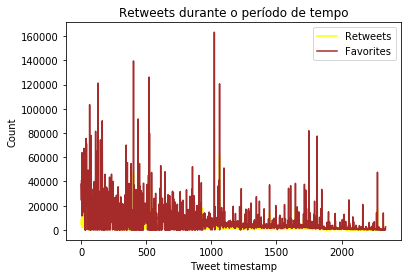

In [32]:
import matplotlib.pyplot as plt
df_view['retweet_count'].plot(color = 'yellow', label='Retweets')
df_view['favorite_count'].plot(color = 'Brown', label='Favorites')

plt.legend(loc='upper right')
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.title('Retweets durante o período de tempo')
#plt.savefig('retweets_favorites.jpg')
plt.show()

In [33]:
df = pd.read_csv('twitter_archive_master.csv')

### Comparação entre a quantidade de cachorros e os estágios entre eles

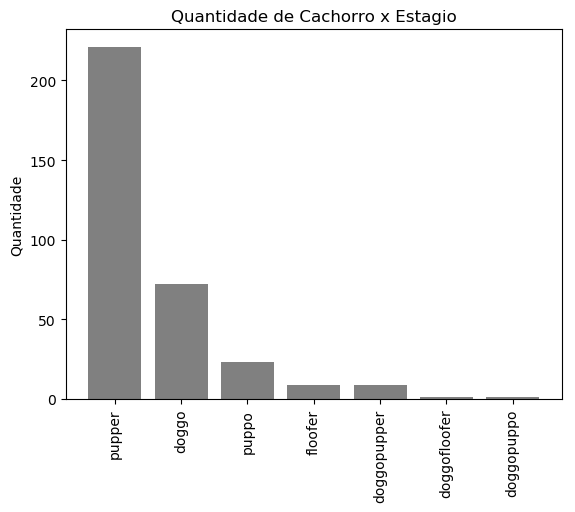

In [34]:
# Padrao do matplotlib
plt.rcdefaults()
# Parâmetros para plotar so grafico
df_count = df.loc[df.retweeted_status_id.isnull() & 
                  df.in_reply_to_status_id.isnull()].dog_stage.value_counts()
# Eixo x
objects = df_count.keys().tolist()
# Pontos no gráfico
y_pos = np.arange(len(objects))
# Eixo y
performance = df_count.tolist()
 
# Gráfico em barra
plt.bar(y_pos, performance, align='center', color="gray", alpha=1.0)
# Valores relativos aos eixos acima
plt.xticks(y_pos, objects)
# Rótulo do eixo y
plt.ylabel('Quantidade')
# Título
plt.title('Quantidade de Cachorro x Estagio')
# Rotação dos label do eixo x
plt.xticks(rotation=90)
# Exibição do grafico
plt.show()

### O gráfico mostra os dez nomes mais curtidos

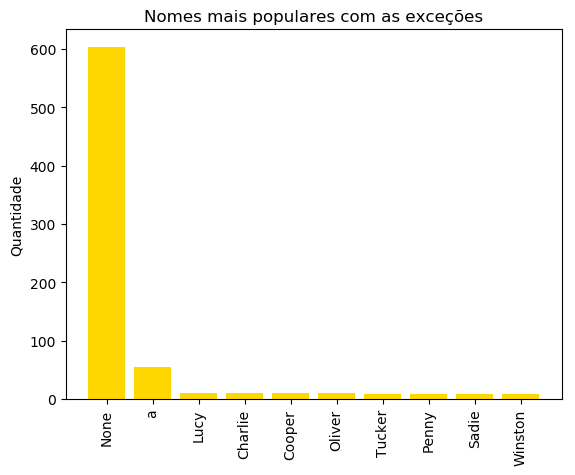

In [35]:
# dados que serao plotados no grafico
df_count = df.loc[df.retweeted_status_id.isnull() & 
                  df.in_reply_to_status_id.isnull() &
                  df.name.notnull()]
# buscando somente o 10 maiores valores (top 10)
df_count = df_count.name.value_counts().nlargest(10)

# criando os valores do eixo X
objects = df_count.keys().tolist()
# qtd de itens a ser plotado no grafico
y_pos = np.arange(len(objects))
# valores de cada ponto no grafico
performance = df_count.tolist()

# crio grafico de barra
plt.bar(y_pos, performance, align='center', color="gold", alpha=1.0)
# crio o eixo X, com os label e valores do eixo Y
plt.xticks(y_pos, objects)
# label do eixo Y
plt.ylabel('Quantidade')
# titulo do grafico
plt.title('Nomes mais populares com as exceções')
# rotação do label no eixo X
plt.xticks(rotation=90)
# mostro o grafico
plt.show()

### Os dez nomes mais lembrados, sem as nomes sem sentido

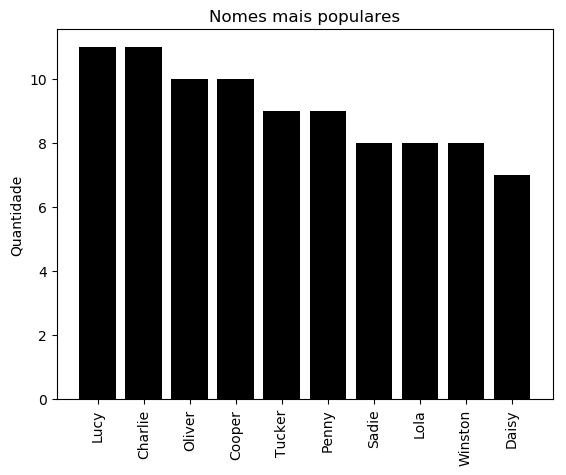

In [36]:
# consulto os valores que serão exibidos no grafico
df_count = df.loc[df.retweeted_status_id.isnull() & 
                  df.in_reply_to_status_id.isnull() &
                  df.name.notnull()]

# busco os 10 maiores valores onde a coluna name seja diferentes de NONE, a, the
df_count = df_count.query("name != 'None' & name != 'a' & name != 'the'").name.value_counts().nlargest(10)

# Rótulo de eixo X
objects = df_count.keys().tolist()
# Dados para plotagem
y_pos = np.arange(len(objects))
performance = df_count.tolist()

# Estabele o gráfico
plt.bar(y_pos, performance, align='center', color="black", alpha=1.0)
# Plotagem para os valores de x e y
plt.xticks(y_pos, objects)
# Eixo Y
plt.ylabel('Quantidade')
# titulo do grafico
plt.title('Nomes mais populares')
# Rotação do eixo x
plt.xticks(rotation=90)
# Exibição do gráfico
plt.show()